# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
import sklearn 
from sklearn import model_selection 
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_predict

#datasets
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

# Importing dataset from sklearn

In [2]:
cali_house=datasets.fetch_california_housing()

In [3]:
calidata = cali_house.data
calidata

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
column=cali_house.feature_names
house=pd.DataFrame(calidata,columns=column)
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Statistical Description

In [5]:
house.shape

(20640, 8)

20640 rows and 8 columns present in this dataset.

In [6]:
house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [7]:
house['target']=cali_house.target

In [8]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Here you may see that target column had been added.

In [9]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


Here you may see that every column data is in floating format.

# Exploratory Data Analysis

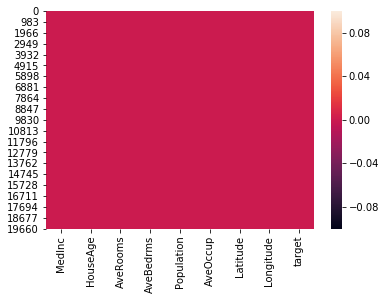

In [10]:
#check weather null value is present or not
sns.heatmap(house.isnull())

Here you may observe that there is no values and missing values present in this data.

In [11]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


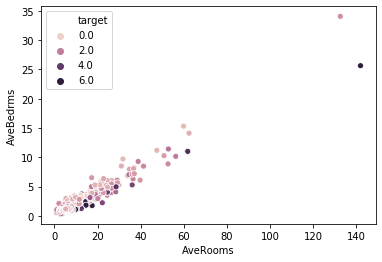

In [12]:
sns.scatterplot(x='AveRooms',y='AveBedrms',hue='target',data =house)

From here we can observe that averooms is in 15-20 and avebedrooms is in 2-5 in that case target variable is good .

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001670FC8DF48>,
      dtype=object)

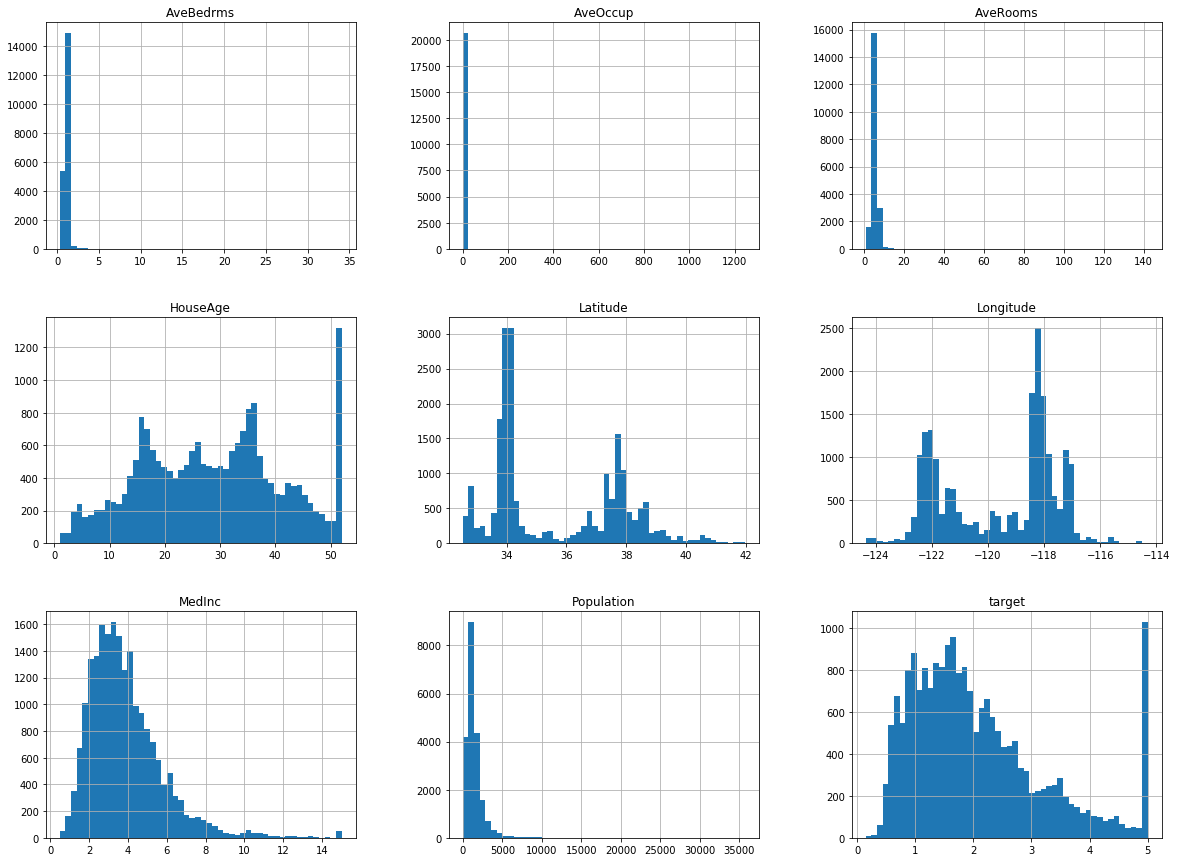

In [13]:
house.hist(bins=50, figsize=(20,15))

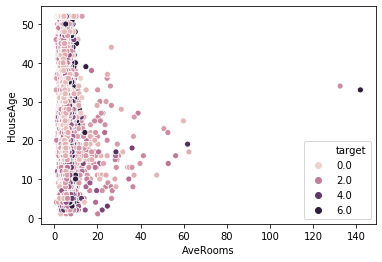

In [14]:
sns.scatterplot(x='AveRooms',y='HouseAge',hue='target',data =house)

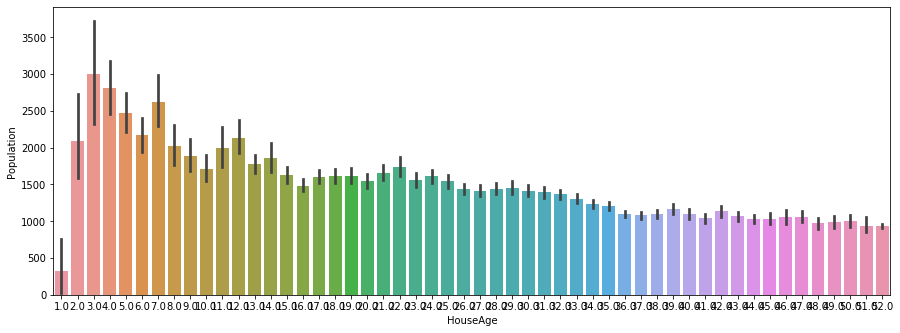

In [15]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.barplot(x="HouseAge", y="Population", data=house)

Most of the populations house age is 3 years and population is in 3000.In very less population and low age population is 1.0

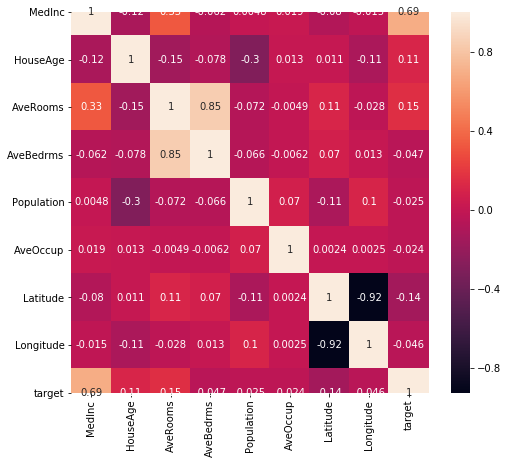

In [16]:
#to check Cor-relation
corr_hmap=house.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

>Latitude is highly Negatively cor-relate with Longitude and vice versa.

# Detecting and Removing outliers

MedInc           AxesSubplot(0.125,0.536818;0.0824468x0.343182)
HouseAge      AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
AveRooms      AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
AveBedrms     AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Population    AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
AveOccup      AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Latitude      AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Longitude     AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
target              AxesSubplot(0.125,0.125;0.0824468x0.343182)
dtype: object

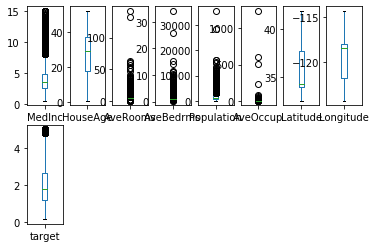

In [17]:
house.plot(kind='box',subplots=True,layout=(2,8))

From here we can observe that there is alot of outliers present in this dataset.

In [18]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(house))
z

array([[2.34476576, 0.98214266, 0.62855945, ..., 1.05254828, 1.32783522,
        2.12963148],
       [2.33223796, 0.60701891, 0.32704136, ..., 1.04318455, 1.32284391,
        1.31415614],
       [1.7826994 , 1.85618152, 1.15562047, ..., 1.03850269, 1.33282653,
        1.25869341],
       ...,
       [1.14259331, 0.92485123, 0.09031802, ..., 1.77823747, 0.8237132 ,
        0.99274649],
       [1.05458292, 0.84539315, 0.04021111, ..., 1.77823747, 0.87362627,
        1.05860847],
       [0.78012947, 1.00430931, 0.07044252, ..., 1.75014627, 0.83369581,
        1.01787803]])

In [19]:
threshold=3
np.where((z>3))

(array([  131,   283,   409,   510,   511,   512,   514,   570,   576,
          710,   780,   799,   864,   865,   867,   869,   871,   922,
          923,   977,   985,   986,   995,  1010,  1021,  1024,  1024,
         1039,  1060,  1086,  1102,  1102,  1233,  1233,  1234,  1234,
         1235,  1235,  1238,  1238,  1239,  1239,  1240,  1240,  1541,
         1560,  1561,  1563,  1564,  1566,  1566,  1574,  1582,  1583,
         1586,  1591,  1593,  1602,  1617,  1621,  1636,  1637,  1642,
         1644,  1645,  1646,  1700,  1867,  1867,  1872,  1872,  1879,
         1889,  1889,  1910,  1910,  1911,  1911,  1912,  1912,  1913,
         1913,  1914,  1914,  1925,  1926,  1926,  1930,  1978,  1978,
         1979,  1979,  2025,  2119,  2213,  2294,  2311,  2392,  2392,
         2395,  2395,  2396,  2396,  2397,  2397,  2398,  2398,  2511,
         2511,  2776,  2826,  2963,  2969,  2975,  2978,  2999,  3004,
         3086,  3086,  3167,  3177,  3258,  3258,  3292,  3334,  3350,
      

In [20]:
z[131][0]

4.0694430501296885

In [21]:
z[20544][4]

4.330954631498988

In [22]:
house_new=house[(z<3).all(axis=1)]#removing outliers

In [23]:
house.shape

(20640, 9)

In [24]:
house_new.shape

(19794, 9)

846 rows had been removed as an outleirs .

# check distribution of skewness

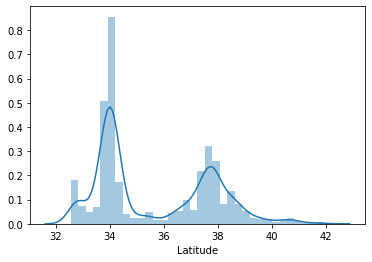

In [25]:
sns.distplot(house_new['Latitude'])

In [26]:
collist=house_new.columns
ncol=9
nrows=7

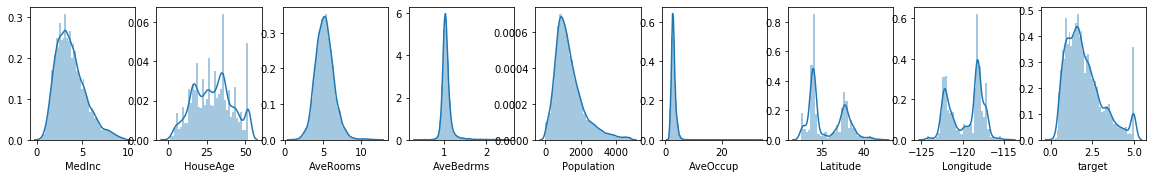

In [27]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(house_new[collist[i]])

In [28]:
house_new.skew()

MedInc        0.786048
HouseAge      0.046496
AveRooms      0.555865
AveBedrms     3.913734
Population    1.346151
AveOccup      5.789707
Latitude      0.460162
Longitude    -0.292814
target        0.970197
dtype: float64

dataset has there is skewness and it's better to drop this skewness.

In [29]:
x=house_new.iloc[:,:-1]
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
le=LabelEncoder()
list1=x.columns
for i in list1:
    x[i]=le.fit_transform(x[i].astype(float))

In [31]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,12120,40,17109,4561,291,6033,514,169
1,12115,20,15045,1716,2340,2129,512,170
2,11660,51,18327,8162,463,8853,511,168
3,10038,51,13097,8143,525,5939,511,167
4,6530,51,15209,8658,532,2554,511,167


In [32]:
y=house_new.iloc[:,-1]
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [33]:
y.shape

(19794,)

In [34]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [35]:
x.skew()

MedInc        0.158251
HouseAge      0.046496
AveRooms      0.001447
AveBedrms     0.105681
Population   -1.645419
AveOccup      0.007379
Latitude      0.452384
Longitude    -0.300426
dtype: float64

Now it's perfect.

# Splitting Dataset

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=78)

In [37]:
x_train.shape

(15043, 8)

In [38]:
y_train.shape

(15043,)

In [39]:
x_test.shape


(4751, 8)

In [40]:
y_test.shape

(4751,)

In [41]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [42]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# training a machine learning model

In [43]:
lr=LinearRegression(normalize=True)
rfr=RandomForestRegressor()
rg=RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

In [44]:
#prepare models
models=[]
models.append(('LinearRegression',lr))
models.append(('RandomForestRegressor',rfr)) 
models.append(('RidgeCV',rg)) 
#evaluate each model
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
RSquare=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    sr=model.score(x_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    rsquare=metrics.r2_score(y_test,pred)
    print('R-square',rsquare)
    RSquare.append(rsquare)

*********************** LinearRegression ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score 0.6248170703336808


Performance Measures:
MAE 0.5130547884839264
MSE 0.4734356620318809
RMSE 0.6880666116241079
R-square 0.6140408297792881
*********************** RandomForestRegressor ************


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


score 0.9575066013825629


Performance Measures:
MAE 0.36650835014121813
MSE 0.30435577777804845
RMSE 0.5516844911523692
R-square 0.7518799007684709
*********************** RidgeCV *********

In [45]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'RSquare':RSquare},columns=['models','score','MAE','MSE','RMSE','RSquare'])
result

,models,score,MAE,MSE,RMSE,RSquare
0,LinearRegression,62.481707,0.513055,0.473436,0.688067,0.614041
1,RandomForestRegressor,95.750660,0.366508,0.304356,0.551684,0.751880
2,RidgeCV,62.356750,0.513061,0.476056,0.689968,0.611905


# Predicting Data

In [46]:
pred=rfr.predict(x_test)
print("predicted target",pred)
print("actual target",y_test)

predicted target [2.0445 1.6748 1.5593 ... 2.3423 3.3331 2.7734]
actual target 6197     1.767
7249     1.768
6259     1.565
12343    1.125
17510    2.042
         ...  
20362    2.476
12782    0.705
3775     2.750
17228    3.831
20461    2.399
Name: target, Length: 4751, dtype: float64


# Saving Model

In [47]:
x=pd.DataFrame(pred)
x.to_csv('linear_house.csv')

In [48]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfr,'house.obj')
#load the model from a file
rfr_from_joblib=joblib.load('house.obj')
#use the loaded model to make prediction
rfr_from_joblib.predict(x_test)

array([2.0445, 1.6748, 1.5593, ..., 2.3423, 3.3331, 2.7734])